# Using a csv dataset provided by the Hass Avocado Board, create a machine learning model to predict the best location in the United States for a retail store to sell a new avocado product. 

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*

### Clean the data

In [2]:
#read the dataset
data = 'avocado-updated-2020.csv'
#df = pd.read_csv(data, index_col = 'geography')
df = pd.read_csv(data)
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1/4/2015,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1/4/2015,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,1/4/2015,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,1/4/2015,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,1/4/2015,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [3]:
df.info

<bound method DataFrame.info of             date  average_price  total_volume        4046        4225  \
0       1/4/2015           1.22      40873.28     2819.50    28287.42   
1       1/4/2015           1.79       1373.95       57.42      153.88   
2       1/4/2015           1.00     435021.49   364302.39    23821.16   
3       1/4/2015           1.76       3846.69     1500.15      938.35   
4       1/4/2015           1.08     788025.06    53987.31   552906.04   
...          ...            ...           ...         ...         ...   
30016  5/17/2020           1.58    2271254.00   150100.00   198457.00   
30017  5/17/2020           1.09    8667913.24  2081824.04  1020965.12   
30018  5/17/2020           1.71     384158.00    23455.00    39738.00   
30019  5/17/2020           0.89    1240709.05   430203.10   126497.28   
30020  5/17/2020           1.58      36881.00     1147.00     1243.00   

           4770  total_bags  small_bags  large_bags  xlarge_bags  \
0         49.90     971

In [4]:
df.isnull().sum()

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
dtype: int64

In [5]:
#Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

In [6]:
#Drop the null rows
df = df.dropna()
df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1/4/2015,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,1/4/2015,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,1/4/2015,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,1/4/2015,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,1/4/2015,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30016,5/17/2020,1.58,2271254.00,150100.00,198457.00,5429.00,1917250.00,1121691.00,795559.00,0.00,organic,2020,Total U.S.
30017,5/17/2020,1.09,8667913.24,2081824.04,1020965.12,33410.85,5531562.87,2580802.48,2817078.77,133681.62,conventional,2020,West
30018,5/17/2020,1.71,384158.00,23455.00,39738.00,1034.00,319932.00,130051.00,189881.00,0.00,organic,2020,West
30019,5/17/2020,0.89,1240709.05,430203.10,126497.28,21104.42,662904.25,395909.35,265177.09,1817.81,conventional,2020,West Tex/New Mexico


### Same number of rows (30021) and columns (13) in df after dropping the null columns and rows.

In [7]:
# Determine the dytpes of each column 
df.dtypes

date              object
average_price    float64
total_volume     float64
4046             float64
4225             float64
4770             float64
total_bags       float64
small_bags       float64
large_bags       float64
xlarge_bags      float64
type              object
year               int64
geography         object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30021 entries, 0 to 30020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30021 non-null  object 
 1   average_price  30021 non-null  float64
 2   total_volume   30021 non-null  float64
 3   4046           30021 non-null  float64
 4   4225           30021 non-null  float64
 5   4770           30021 non-null  float64
 6   total_bags     30021 non-null  float64
 7   small_bags     30021 non-null  float64
 8   large_bags     30021 non-null  float64
 9   xlarge_bags    30021 non-null  float64
 10  type           30021 non-null  object 
 11  year           30021 non-null  int64  
 12  geography      30021 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.2+ MB


### Convert columns to dtypes that will work with the machine learning model.

In [9]:
# Convert the date column to a timestamp for the machine learning model
df["date"] = df["date"].map(pd.to_datetime)
df["date"][0]

Timestamp('2015-01-04 00:00:00')

In [10]:
import datetime
df["date"] = df["date"].map(lambda x: (x-datetime.datetime(1970,1,1)).total_seconds())
df["date"]

0        1.420330e+09
1        1.420330e+09
2        1.420330e+09
3        1.420330e+09
4        1.420330e+09
             ...     
30016    1.589674e+09
30017    1.589674e+09
30018    1.589674e+09
30019    1.589674e+09
30020    1.589674e+09
Name: date, Length: 30021, dtype: float64

In [11]:
# Change the 'type' column from words to numbers for the ml model
df.type.map(dict(conventional=1, organic=0))
df = df.replace(to_replace="conventional", value="1")
df = df.replace(to_replace="organic", value="0")
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1.420330e+09,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,1,2015,Albany
1,1.420330e+09,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,0,2015,Albany
2,1.420330e+09,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,1,2015,Atlanta
3,1.420330e+09,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,0,2015,Atlanta
4,1.420330e+09,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,1,2015,Baltimore/Washington


In [12]:
# Create a list of locations from the geography column and convert them all to numbers for the machine learning model
df['geography'].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

In [13]:
#Determine if there is duplicated data
print('total number of duplicate values : ',sum(df.duplicated()))

total number of duplicate values :  0


# Explore the dataset and prepare the data for the machine learning model

### The target column for the machine learning model will be the geography column because we are trying to predict a location for the next retail store.

In [14]:
#Determine the distribution of the data in the geography column 
# Checking for class balance using the column I think will be the target: geography
df.groupby('geography').size() 

geography
Albany                  556
Atlanta                 556
Baltimore/Washington    556
Boise                   556
Boston                  556
Buffalo/Rochester       556
California              556
Charlotte               556
Chicago                 556
Cincinnati/Dayton       556
Columbus                556
Dallas/Ft. Worth        556
Denver                  556
Detroit                 556
Grand Rapids            556
Great Lakes             556
Harrisburg/Scranton     556
Hartford/Springfield    556
Houston                 556
Indianapolis            556
Jacksonville            556
Las Vegas               556
Los Angeles             556
Louisville              556
Miami/Ft. Lauderdale    556
Midsouth                556
Nashville               556
New Orleans/Mobile      556
New York                556
Northeast               556
Northern New England    556
Orlando                 556
Philadelphia            556
Phoenix/Tucson          556
Pittsburgh              556
Plains    

In [15]:
df.geography.unique

<bound method Series.unique of 0                      Albany
1                      Albany
2                     Atlanta
3                     Atlanta
4        Baltimore/Washington
                 ...         
30016              Total U.S.
30017                    West
30018                    West
30019     West Tex/New Mexico
30020     West Tex/New Mexico
Name: geography, Length: 30021, dtype: object>

In [47]:
# Drop the geography columns that summarize the data already found in the cities...
df.drop(df.loc[df['geography']== 'California'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Great Lakes'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Northeast'].index, inplace=True)
df.drop(df.loc[df['geography']== 'South Central'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Plains'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Northern New England'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Total U.S.'].index, inplace=True)
df.drop(df.loc[df['geography']== 'West'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Great Lakes'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Southeast'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Houston'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Tampa'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Las Vegas'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Charlotte'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Grand Rapids'].index, inplace=True)
df.head(20)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1.420330e+09,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,1,2015,0
1,1.420330e+09,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,0,2015,0
2,1.420330e+09,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,1,2015,1
3,1.420330e+09,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,0,2015,1
4,1.420330e+09,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,1,2015,2
5,1.420330e+09,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.00,0,2015,2
6,1.420330e+09,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,1,2015,3
7,1.420330e+09,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,0,2015,3
8,1.420330e+09,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.00,1,2015,4
9,1.420330e+09,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.00,0,2015,4


In [48]:
# Determine the number of rows after the summary rows are deleted
df['geography'].nunique()

41

### Determine specific information about the geography column

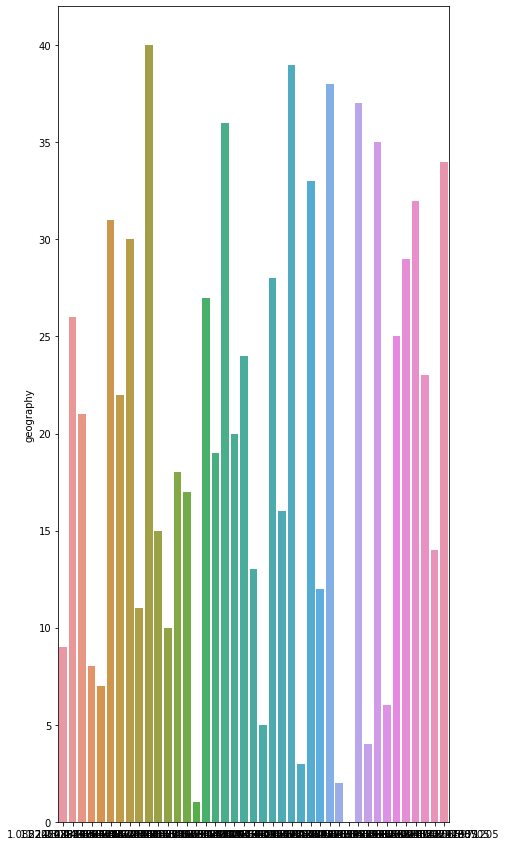

In [49]:
# Which geographic location contains the highest average price for avocados
avg_pr=df.groupby('geography')['average_price'].mean().sort_values(ascending=False).values
loc=df.groupby('geography')['average_price'].mean().sort_values(ascending=False).index
plt.figure(figsize=(7,15))
sns.barplot(x=avg_pr,y=loc)

Text(0.5, 1.0, 'Average Pieces Sold per Area')

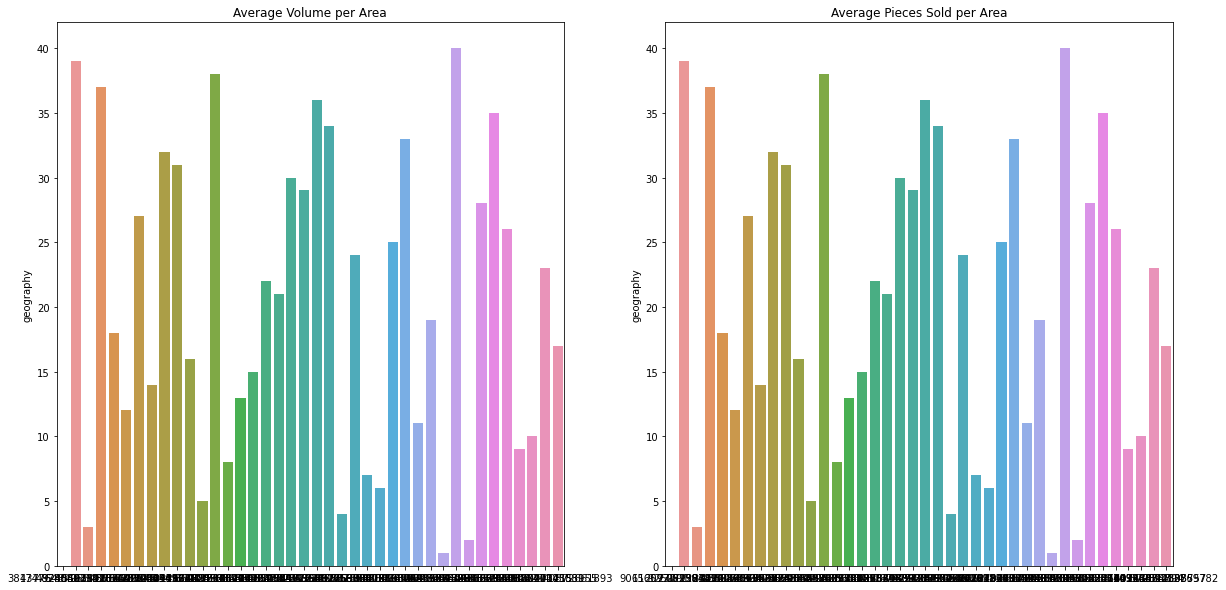

In [50]:
# Which geographical area consumed the most avocaos
avg_vol=df.groupby('geography')['total_volume'].mean().sort_values(ascending=False).values[1:]
loc=df.groupby('geography')['total_volume'].mean().sort_values(ascending=False).index[1:]

avg_bag=df.groupby('geography')['total_bags'].mean().sort_values(ascending=False).values[1:]
loc=df.groupby('geography')['total_bags'].mean().sort_values(ascending=False).index[1:]

fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.barplot(x=avg_vol,y=loc,ax=ax[0])
ax[0].set_title('Average Volume per Area')

sns.barplot(x=avg_bag,y=loc,ax=ax[1])
ax[1].set_title('Average Pieces Sold per Area')

Text(0.5, 1.0, 'Organic Average Price by Month')

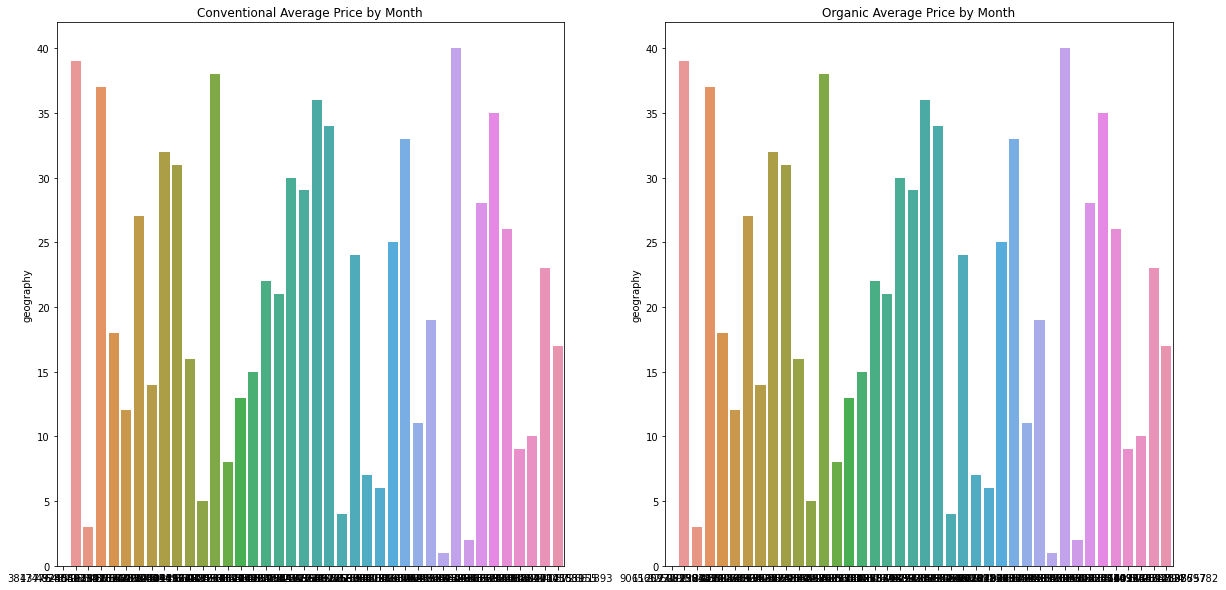

In [51]:
# What is the average price per month in each of the geographical locations? 
average_price=df.groupby('geography')['total_volume'].mean().sort_values(ascending=False).values[1:]
loc=df.groupby('geography')['total_volume'].mean().sort_values(ascending=False).index[1:]
average_price=df.groupby('geography')['total_bags'].mean().sort_values(ascending=False).values[1:]
loc=df.groupby('geography')['total_bags'].mean().sort_values(ascending=False).index[1:]


fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.barplot(x=avg_vol,y=loc,ax=ax[0])
ax[0].set_title('Conventional Average Price by Month')

sns.barplot(x=avg_bag,y=loc,ax=ax[1])
ax[1].set_title('Organic Average Price by Month')

In [52]:
# The 'type' column needs to be converted for the machine learning model
df.type.map(dict(conventional=1, organic=0))
df = df.replace(to_replace="conventional", value="1")
df = df.replace(to_replace="organic", value="0")
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1.420330e+09,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,1,2015,0
1,1.420330e+09,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,0,2015,0
2,1.420330e+09,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,1,2015,1
3,1.420330e+09,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,0,2015,1
4,1.420330e+09,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,1,2015,2


In [53]:
#Determine the pairwise correlation of all columns in the dataframe
df.corr()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
date,1.000000,0.013631,0.062595,0.007998,-0.037334,-0.064598,0.187126,0.135143,0.245637,0.113920,-0.000061,0.983096,0.000103
average_price,0.013631,1.000000,-0.361660,-0.387261,-0.234860,-0.217912,-0.316140,-0.286775,-0.284633,-0.096471,-0.593304,-0.012831,0.056587
total_volume,0.062595,-0.361660,1.000000,0.855571,0.811521,0.568865,0.919292,0.915214,0.598144,0.430043,0.496298,0.072086,-0.017418
4046,0.007998,-0.387261,0.855571,1.000000,0.481606,0.454103,0.747771,0.743311,0.486005,0.369802,0.416757,0.016845,0.029154
4225,-0.037334,-0.234860,0.811521,0.481606,1.000000,0.492102,0.619682,0.653527,0.335139,0.150318,0.443417,-0.028847,-0.043836
4770,-0.064598,-0.217912,0.568865,0.454103,0.492102,1.000000,0.458447,0.480055,0.203429,0.423057,0.324276,-0.057489,-0.082645
total_bags,0.187126,-0.316140,0.919292,0.747771,0.619682,0.458447,1.000000,0.961063,0.722090,0.556758,0.422253,0.194334,-0.020563
small_bags,0.135143,-0.286775,0.915214,0.743311,0.653527,0.480055,0.961063,1.000000,0.506797,0.508930,0.392272,0.141921,-0.022604
large_bags,0.245637,-0.284633,0.598144,0.486005,0.335139,0.203429,0.722090,0.506797,1.000000,0.350120,0.351267,0.251804,-0.004737
xlarge_bags,0.113920,-0.096471,0.430043,0.369802,0.150318,0.423057,0.556758,0.508930,0.350120,1.000000,0.162387,0.114485,-0.028955


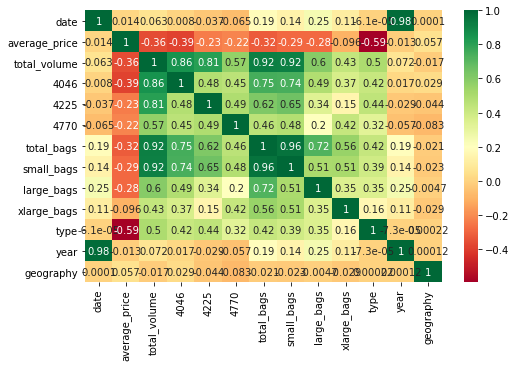

In [54]:
#Plot the relationships in a heat map to visualize the degree of relatedness.
plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()

## Train and validate the dataset for machine learning.

In [55]:
#train the data by putting geography in the y axis and all other columns in the x axis 
X=df.drop('geography',1)
y=df['geography']

In [56]:
# print the shape of the dataset
print('shape of X and y :',X.shape,y.shape)

shape of X and y : (22793, 12) (22793,)


In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [58]:
print('shape of X and y (train) :',X_train.shape,y_train.shape)
print('shape of X and y (test) :',X_test.shape,y_test.shape)

shape of X and y (train) : (18234, 12) (18234,)
shape of X and y (test) : (4559, 12) (4559,)


 ## Preprocess the dataset

In [59]:
#Encode the catagorical columns for use in the ml model
le = LabelEncoder()
df['geography'] = le.fit_transform(df['geography'])
df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1.420330e+09,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,1,2015,0
1,1.420330e+09,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,0,2015,0
2,1.420330e+09,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,1,2015,1
3,1.420330e+09,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,0,2015,1
4,1.420330e+09,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,1,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30010,1.589674e+09,2.02,8478.00,1536.00,1468.00,0.00,5473.00,3373.00,2100.00,0.00,0,2020,38
30011,1.589674e+09,1.31,117231.76,12121.98,47634.53,941.62,56533.63,44340.34,10544.39,1648.90,1,2020,39
30012,1.589674e+09,1.63,1798.00,249.00,143.00,0.00,1407.00,1111.00,295.00,0.00,0,2020,39
30019,1.589674e+09,0.89,1240709.05,430203.10,126497.28,21104.42,662904.25,395909.35,265177.09,1817.81,1,2020,40


In [60]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1.420330e+09,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,1,2015,0
1,1.420330e+09,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,0,2015,0
2,1.420330e+09,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,1,2015,1
3,1.420330e+09,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,0,2015,1
4,1.420330e+09,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,1,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30010,1.589674e+09,2.02,8478.00,1536.00,1468.00,0.00,5473.00,3373.00,2100.00,0.00,0,2020,38
30011,1.589674e+09,1.31,117231.76,12121.98,47634.53,941.62,56533.63,44340.34,10544.39,1648.90,1,2020,39
30012,1.589674e+09,1.63,1798.00,249.00,143.00,0.00,1407.00,1111.00,295.00,0.00,0,2020,39
30019,1.589674e+09,0.89,1240709.05,430203.10,126497.28,21104.42,662904.25,395909.35,265177.09,1817.81,1,2020,40


In [61]:
# Determine that the geography column has been converted for the machine learning model
df.geography.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40], dtype=int64)

In [62]:
# Determine which columns are not contributing a pattern or key for the best accuracy
scaler=VarianceThreshold(0.1)

In [63]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [64]:
print('shape of X (train) :',X_train.shape)
print('shape of X (test) :',X_test.shape)

shape of X (train) : (18234, 12)
shape of X (test) : (4559, 12)


### All of the columns (12) may be useful for predicting the data, so each column needs to be scaled to determine the range values. If the values are all different the data will need to be scaled for better performance.

In [65]:
scaler=StandardScaler()

In [66]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [67]:
df_scaled = scaler.fit_transform(df)[:5]
df_scaled

array([[-1.71382651, -0.47072589, -0.46312462, -0.41373388, -0.33704254,
        -0.32678085, -0.43936742, -0.39805817, -0.39198923, -0.16249173,
         0.99986839, -1.40445148, -1.69029267],
       [-1.71382651,  1.00012737, -0.53145573, -0.42714541, -0.46900579,
        -0.328976  , -0.47578567, -0.44201252, -0.39926864, -0.16249173,
        -1.00013163, -1.40445148, -1.69029267],
       [-1.71382651, -1.03842365,  0.21872453,  1.34147954, -0.35799199,
        -0.32536215, -0.28141529, -0.35686489,  0.01463255, -0.16249173,
         0.99986839, -1.40445148, -1.60576691],
       [-1.71382651,  0.92271405, -0.52717806, -0.42014011, -0.46532616,
        -0.328976  , -0.47474027, -0.44251263, -0.39463812, -0.16249173,
        -1.00013163, -1.40445148, -1.60576691],
       [-1.71382651, -0.8319881 ,  0.82939629, -0.16528387,  2.12373491,
         1.43044397,  0.12016029,  0.3028597 , -0.34441002, -0.16249173,
         0.99986839, -1.40445148, -1.52124115]])

In [68]:
# Verify that the mean of ech column and standard deviation
print(np.mean(df_scaled[:,0]))
print(np.std(df_scaled[:,0]))

-1.7138265142607245
2.220446049250313e-16


In [69]:
# Change the dataframe into a numpy ndarray
print("Type of X_train :",type(X_train))
print("Type of X_test :",type(X_test))

Type of X_train : <class 'numpy.ndarray'>
Type of X_test : <class 'numpy.ndarray'>


In [70]:
#Convert the ndarray into a pandas dataframe
X_train=pd.DataFrame(X_train)
X_train.head()
X_test=pd.DataFrame(X_test)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.209090,1.174863,-0.493912,-0.431327,-0.458152,-0.328903,-0.387333,-0.340437,-0.368237,-0.162216,-1.002196,0.504844
1,-0.396417,-0.161773,-0.257277,-0.423058,-0.141158,-0.326409,-0.102685,0.023815,-0.364318,-0.162216,0.997809,-0.131850
2,-0.051419,0.969227,-0.511413,-0.420883,-0.449723,-0.314212,-0.448599,-0.406234,-0.400846,-0.162216,-1.002196,-0.131850
3,1.587322,-1.087137,5.999831,4.377549,-0.189615,5.478229,10.573789,8.737708,8.844266,19.369237,0.997809,1.778233
4,0.601613,0.352318,-0.525367,-0.429394,-0.458840,-0.328903,-0.465725,-0.432839,-0.389260,-0.162216,-1.002196,0.504844


In [71]:
print('Type of X_train and X_test :',type(X_train),type(X_test))

Type of X_train and X_test : <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


# Create four machine learning model pipelines to determine which will provide the best prediction for a U.S. location to begin the fast food trials. The four models are: Polynomial (Linear) Regression, Ridge Regression, Lasso Regressor, and RandomForest Regressor

## Polynomial Regression

In [72]:
# # Store info for plotting
# loss=[]
# val_loss=[]

In [73]:
#   pm=make_pipeline(PolynomialFeatures(3),LinearRegression())
#   pm.fit(X_train,y_train)
#   y_pr=pm.predict(X_test)
#   y_x=pm.predict(X_train)
#   loss.append(mean_squared_error(y_train,y_x))
#   val_loss.append(mean_squared_error(y_test,y_pr))

In [74]:
# plt.title('Model Loss')
# plt.xlabel('degree')
# plt.ylabel('MSE loss')
# plt.plot(range(2,5),loss/np.mean(loss),label='train loss')
# plt.plot(range(2,5),val_loss/np.mean(val_loss),label='validation loss')
# plt.legend()
# plt.show()

### The plot above demonstrates that after degree>3.26 the model is overfitting.

In [75]:
# print('Train loss and validation loss of the polynomial function model :',loss[1],'and',val_loss[1])

In [76]:
pm=make_pipeline(PolynomialFeatures(3),LinearRegression())
pm.fit(X_train,y_train)
print('train accuracy :',pm.score(X_train,y_train))
print('test accuracy :',pm.score(X_test,y_test))

train accuracy : 0.1963270363389381
test accuracy : -29283.485192547574


## Ridge Regression

In [77]:
# Ridge model
pm=Ridge(random_state=0,alpha=0.01)
pm.fit(X_train,y_train)
y_tr1=pm.predict(X_train)
y_pr=pm.predict(X_test)

print('train data accuracy :',pm.score(X_train,y_train))
print('test data accuracy :',pm.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

train data accuracy : 0.024672129989734448
test data accuracy : 0.014070392553144906
loss of train data : 137.13286830191137
loss of test data : 135.48120247842414


## Lasso Regression

In [78]:
# Lasso model
pm=Lasso(random_state=0,alpha=0.01)
pm.fit(X_train,y_train)
y_tr1=pm.predict(X_train)
y_pr=pm.predict(X_test)

print('train data accuracy :',pm.score(X_train,y_train))
print('test data accuracy :',pm.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

train data accuracy : 0.024462462748885416
test data accuracy : 0.013615421237987313
loss of train data : 137.16234789642587
loss of test data : 135.54372221655265


## Bayesian Ridge Regression

In [79]:
# BayesianRidge model
pm=BayesianRidge()
pm.fit(X_train,y_train)
y_tr1=pm.predict(X_train)
y_pr=pm.predict(X_test)

print('train data accuracy :',pm.score(X_train,y_train))
print('test data accuracy :',pm.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

train data accuracy : 0.0245355746080127
test data accuracy : 0.01389576232730294
loss of train data : 137.15206823636765
loss of test data : 135.50519923519806


## Random Forest Regression

In [80]:
#RandomForest model 
pm = RandomForestRegressor(random_state=0)

In [81]:
pm.fit(X_train,y_train)
y_tr1=pm.predict(X_train)
y_pr=pm.predict(X_test)

print('train data accuracy :',pm.score(X_train,y_train))
print('test data accuracy :',pm.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

train data accuracy : 0.9760720442962847
test data accuracy : 0.8258906559136814
loss of train data : 3.364313990347702
loss of test data : 23.925179973678443


In [ ]:
# 